In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
sns.set()
from sklearn.model_selection import train_test_split
# importing the SMOTE library
from imblearn.over_sampling import SMOTE
# importing the important libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from statistics import mean

In [4]:
# Load csv file
df = pd.read_csv('/config/workspace/hypothyroid.csv', na_values="na")

In [5]:
df.shape

(3772, 30)

In [6]:
# Check unique values of target varaible
df['Class'].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 30 categorical features : ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source', 'Class']


In [8]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [9]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [10]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, df[column][df[column]=='?'].count())

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


In [11]:
df = df.drop(['TBG','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)
df.shape

(3772, 23)

In [12]:
# Now let's replace the '?' values with numpy nan
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        df[column] = df[column].replace('?',np.nan)

In [13]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

In [14]:
for column in df.columns:
    if  len(df[column].unique())==2:
        df[column] = df[column].map({'f' : 0, 't' : 1})

In [15]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,M,0,0,0,0,0,0,0,0,...,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,F,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,F,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,SVI,negative


In [16]:
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

In [17]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,SVI,negative


In [18]:
df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [19]:
df = pd.get_dummies(df, columns=['referral_source'])

In [20]:
df['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [21]:
# lets use label encoder
lblEn = LabelEncoder()
df['Class'] =lblEn.fit_transform(df['Class'])

In [66]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,0,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,0,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,0,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,0,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,0,0,0,1,0


In [22]:
df.shape

(3772, 27)

In [23]:
# Splitting X and y for all Experiments
X= df.drop('Class', axis=1)
y = df['Class']

In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [25]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [26]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

n_neighbors= 1 || accuracy (0.9435)


/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

n_neighbors= 3 || accuracy (0.9478)


/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

n_neighbors= 5 || accuracy (0.9425)


/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

n_neighbors= 7 || accuracy (0.9425)
n_neighbors= 9 || accuracy (0.9425)


/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
# n_neighbors= 3 || accuracy (0.9478) having the highest accuracy

In [27]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=df.columns)

/tmp/ipykernel_1138/2870868188.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[column])
/tmp/ipykernel_1138/2870868188.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[column])
/tmp/ipykernel_1138/2870868188.py:9: UserWarning: 

`distplot` is a deprecated function and wi

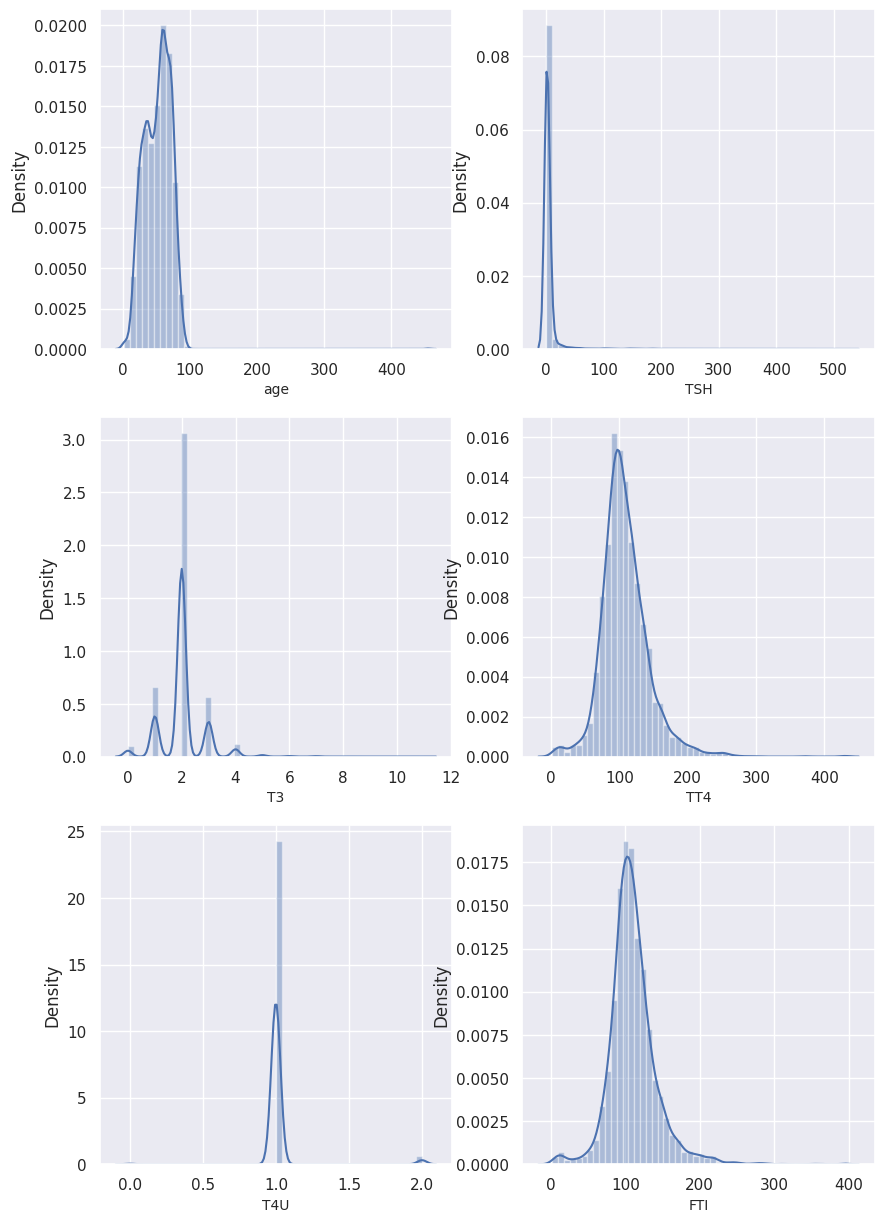

In [80]:
# checking the distribution of the continuous data
columns = ['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(new_data[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

In [28]:
new_data['Class'].value_counts()

1.0    3481
0.0     194
2.0      95
3.0       2
Name: Class, dtype: int64

Highly imbalanced dataset we have.

In [35]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [36]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)

In [37]:
x_sampled.shape

(13924, 26)

In [38]:
y_sampled.value_counts()

1.0    3481
0.0    3481
2.0    3481
3.0    3481
Name: Class, dtype: int64

In [39]:
# spliting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 149) 

In [40]:
# create an instance of a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

# training the Random Forest model on the sampled train dataset
random_forest_model.fit(np.array(x_sampled), y_sampled)

# pedicting the labels on the test set
y_predicted_randomforest = random_forest_model.predict(np.array(X_test))

In [41]:
from sklearn import metrics

# calculating the accuracy on train data
print('Accuracy Score on train data: ', metrics.accuracy_score(y_true = y_sampled, y_pred = random_forest_model.predict(x_sampled)))

# calculating the accuracy on test data
print('Accuracy Score on test data: ', metrics.accuracy_score(y_true = y_test, y_pred = y_predicted_randomforest))

Accuracy Score on train data:  0.9997845446710716
Accuracy Score on test data:  1.0


/config/.local/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid_knn = {
                'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
                'leaf_size' : [10,17,24,28,30,35],
                'n_neighbors':[4,5,8,10,11],
                'p':[1,2]
            }
grid = GridSearchCV(knn, param_grid_knn, verbose=3,
                                     cv=5)

In [46]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.960 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.951 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.947 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.945 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.947 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.956 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.955 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.945 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.941 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.947 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1;, score=0.947 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1;, score=0.955 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1;, score=0.943 total time=   0.0s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 17, 24, 28, 30, 35],
                         'n_neighbors': [4, 5, 8, 10, 11], 'p': [1, 2]},
             verbose=3)

In [47]:
algorithm = grid.best_params_['algorithm']
leaf_size = grid.best_params_['leaf_size']
n_neighbors = grid.best_params_['n_neighbors']
p  = grid.best_params_['p']
print(algorithm)
print(leaf_size)
print(n_neighbors)
print(p)

kd_tree
10
5
2


In [49]:
knn = KNeighborsClassifier(algorithm="kd_tree", leaf_size=10, n_neighbors=5,p=2,n_jobs=-1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_jobs=-1)

In [50]:
#Now trying to find the best params for Random classifier
rcf = RandomForestClassifier()
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']}

In [53]:
grid_rcf = GridSearchCV(estimator=rcf, param_grid=param_grid, cv=5, verbose=3)

In [54]:
grid_rcf.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.932 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.930 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.936 total time=   0.0s


/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_feat

[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.930 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.936 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.920 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.936 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.934 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.932 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.936 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.930 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.934 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.930 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.932 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.934 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.926 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.930 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.934 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.922 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.920 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.930 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.936 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=50;, score=0.928 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=50;, score=0.934 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=50;, score=0.922 total time=   0.1s
[CV 4/5] 

/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.939 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.936 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.932 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.936 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.939 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.943 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.936 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.932 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.936 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.939 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.939 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.936 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.932 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.936 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.938 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.934 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.928 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.934 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.932 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.920 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.934 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.934 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.932 total time=   0.1s
[CV 4/5] 

/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.930 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.932 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.926 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.930 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.932 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.930 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.930 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.930 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.930 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.932 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.932 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.934 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.932 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.934 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.936 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.938 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.922 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.928 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.930 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.920 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.922 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.922 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.920 t

/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.939 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.936 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.934 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.936 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.936 total time=   0.1s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.938 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.938 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.936 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.936 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.941 total time=   0.2s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.939 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.936 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.934 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.936 total time=   0.3s


/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.938 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.936 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.932 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.926 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.934 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.939 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.939 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.936 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.930 t

/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4),
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [61]:
criterion = grid_rcf.best_params_['criterion']
max_depth = grid_rcf.best_params_['max_depth']
max_features = grid_rcf.best_params_['max_features']
n_estimators = grid_rcf.best_params_['n_estimators']
print(criterion)
print(max_depth)
print(max_features)
print(n_estimators)

entropy
3
auto
10


In [62]:
rcf = RandomForestClassifier(n_estimators=10, criterion='entropy',
                                              max_depth=3, max_features='auto')
rcf.fit(X_train,y_train)

/config/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       n_estimators=10)

In [68]:
prediction_knn = knn.predict(X_test)
#knn_score = accuracy_score(test_y, prediction_knn)
knn_score = accuracy_score(y_test, prediction_knn)
print(knn_score)

0.9602473498233216


In [1]:
prediction_random_forest=rcf.predict(X_test)
random_forest_score = accuracy_score(y_test, prediction_random_forest)
print(random_forest_score)

NameError: name 'rcf' is not defined